# **Convolutional Neural Networks: Image classification**

In [20]:
import os, warnings
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import gridspec

In [2]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

#### Setting seed for reproducability

In [3]:
def set_seed(seed=31415):
    np.random.seed(seed)
    tf.random.set_seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    os.environ['TF_DETERMINISTIC_OPS'] = '1'
set_seed(31415)

### Setting matplotlib defaults

In [4]:
plt.rc('figure', autolayout=True)
plt.rc('axes', labelweight='bold', labelsize='large',
       titleweight='bold', titlesize=18, titlepad=10)
plt.rc('image', cmap='magma')
warnings.filterwarnings("ignore") # to clean up output cells

## Loading the dataset

In [8]:
ds_train_ = image_dataset_from_directory(
    'Data/train',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=True,
)
ds_valid_ = image_dataset_from_directory(
    'Data/valid',
    labels='inferred',
    label_mode='binary',
    image_size=[128, 128],
    interpolation='nearest',
    batch_size=64,
    shuffle=False,
)

Found 5117 files belonging to 2 classes.
Found 5051 files belonging to 2 classes.


### Data Pipeline

In [9]:
def convert_to_float(image, label):
    image = tf.image.convert_image_dtype(image, dtype=tf.float32)
    return image, label

AUTOTUNE = tf.data.experimental.AUTOTUNE
ds_train = (
    ds_train_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)
ds_valid = (
    ds_valid_
    .map(convert_to_float)
    .cache()
    .prefetch(buffer_size=AUTOTUNE)
)

### Define Pretrained Base

Keras includes a variety models pretrained on ImageNet in its applications module. The pretrained model we'll use is called VGG16.

In [16]:
pretrained_base = tf.keras.models.load_model(
    'Data/cv-course-models/vgg16-pretrained-base',
)
pretrained_base.trainable = False

In [24]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Flatten(),
    layers.Dense(6, activation='relu'),
    layers.Dense(1, activation='sigmoid'),
])

In [25]:
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=['binary_accuracy'],
)

history = model.fit(
    ds_train,
    validation_data=ds_valid,
    epochs=30,
    verbose=2,
)

Epoch 1/30
80/80 - 2s - loss: 0.6975 - binary_accuracy: 0.5744 - val_loss: 0.6894 - val_binary_accuracy: 0.5785
Epoch 2/30
80/80 - 1s - loss: 0.6878 - binary_accuracy: 0.5787 - val_loss: 0.6864 - val_binary_accuracy: 0.5785
Epoch 3/30
80/80 - 1s - loss: 0.6853 - binary_accuracy: 0.5787 - val_loss: 0.6844 - val_binary_accuracy: 0.5785
Epoch 4/30
80/80 - 1s - loss: 0.6836 - binary_accuracy: 0.5787 - val_loss: 0.6830 - val_binary_accuracy: 0.5785
Epoch 5/30
80/80 - 1s - loss: 0.6825 - binary_accuracy: 0.5787 - val_loss: 0.6821 - val_binary_accuracy: 0.5785
Epoch 6/30
80/80 - 1s - loss: 0.6818 - binary_accuracy: 0.5787 - val_loss: 0.6816 - val_binary_accuracy: 0.5785
Epoch 7/30
80/80 - 1s - loss: 0.6814 - binary_accuracy: 0.5787 - val_loss: 0.6812 - val_binary_accuracy: 0.5785
Epoch 8/30
80/80 - 1s - loss: 0.6811 - binary_accuracy: 0.5787 - val_loss: 0.6810 - val_binary_accuracy: 0.5785
Epoch 9/30
80/80 - 1s - loss: 0.6809 - binary_accuracy: 0.5787 - val_loss: 0.6809 - val_binary_accuracy:

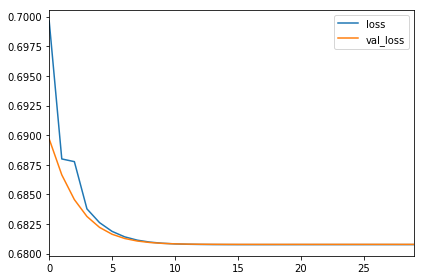

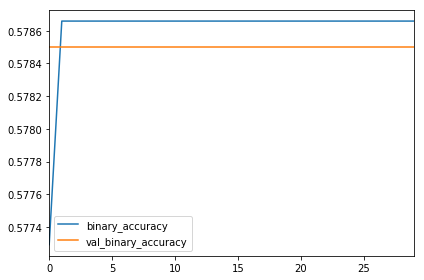

In [21]:
history_frame = pd.DataFrame(history.history)
history_frame.loc[:, ['loss', 'val_loss']].plot()
history_frame.loc[:, ['binary_accuracy', 'val_binary_accuracy']].plot();